In [1]:
!pip install opencv-python
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
categories = os.listdir("C:/Users/Shireen/A FINAL TESS ATTEMPT/data/spectograms/")
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for Alexnet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

fpath = "C:/Users/Shireen/A FINAL TESS ATTEMPT/data/spectograms/"
images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  2800 
No. of labels loaded =  2800
<class 'list'> <class 'list'>


In [3]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (2800, 227, 227, 3) 
Labels shape =  (2800,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
#1-step in data shuffling
random_seed=42
#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 2797 2798 2799]

'n' values after shuffling =  [1088  772 2161 ... 1130 1294  860]


In [5]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (2800, 227, 227, 3) 
Labels shape after shuffling =  (2800,)


In [6]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (2800, 227, 227, 3)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2240, 227, 227, 3)
y_train shape =  (2240,)

x_test shape =  (560, 227, 227, 3)
y_test shape =  (560,)


In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

In [31]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 384)        

In [32]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [33]:
%%time
model.fit(x_train, y_train, epochs=10,batch_size=128)

Epoch 1/20
18/18 [==============================] - 122s 7s/step - loss: 1.0729 - accuracy: 0.7183
Epoch 2/20
18/18 [==============================] - 123s 7s/step - loss: 0.1304 - accuracy: 0.9607
Epoch 3/20
18/18 [==============================] - 121s 7s/step - loss: 0.0589 - accuracy: 0.9812
Epoch 4/20
18/18 [==============================] - 122s 7s/step - loss: 0.0349 - accuracy: 0.9911
Epoch 5/20
18/18 [==============================] - 121s 7s/step - loss: 0.0167 - accuracy: 0.9937
Epoch 6/20
18/18 [==============================] - 122s 7s/step - loss: 0.0101 - accuracy: 0.9973
Epoch 7/20
18/18 [==============================] - 122s 7s/step - loss: 0.0294 - accuracy: 0.9929
Epoch 8/20
18/18 [==============================] - 121s 7s/step - loss: 0.0098 - accuracy: 0.9964
Epoch 9/20
18/18 [==============================] - 121s 7s/step - loss: 0.0109 - accuracy: 0.9960
Epoch 10/20
18/18 [==============================] - 122s 7s/step - loss: 0.0199 - accuracy: 0.9951
Epoch 11/

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7960949540138245
Test accuracy: 0.8232142925262451


In [21]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape)))
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [22]:
IMG_SHAPE = images.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 32)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 32)                4946816   
_________________________________________________________________
sequential_2 (Sequential)    (None, 227, 227, 3)       5101371   
Total params: 10,048,187
Trainable params: 10,048,187
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history = autoencoder.fit(x=x_train, y=x_train, epochs=20,
                validation_data=[x_test, x_test])

Epoch 1/20
70/70 [==============================] - 10s 136ms/step - loss: 0.3361 - val_loss: 0.0000e+00
Epoch 2/20
70/70 [==============================] - 9s 135ms/step - loss: 0.0146 - val_loss: 0.0000e+00
Epoch 3/20
70/70 [==============================] - 10s 137ms/step - loss: 0.0144 - val_loss: 0.0000e+00
Epoch 4/20
70/70 [==============================] - 10s 136ms/step - loss: 0.0144 - val_loss: 0.0000e+00
Epoch 5/20
70/70 [==============================] - 10s 137ms/step - loss: 0.0144 - val_loss: 0.0000e+00
Epoch 6/20
70/70 [==============================] - 10s 138ms/step - loss: 0.0143 - val_loss: 0.0000e+00
Epoch 7/20
70/70 [==============================] - 10s 137ms/step - loss: 0.0143 - val_loss: 0.0000e+00
Epoch 8/20
70/70 [==============================] - 10s 138ms/step - loss: 0.0143 - val_loss: 0.0000e+00
Epoch 9/20
70/70 [==============================] - 10s 138ms/step - loss: 0.0143 - val_loss: 0.0000e+00
Epoch 10/20
70/70 [==============================] - 10s

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


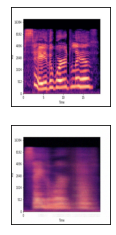

Accuracy= 0.9316340610384941 



In [24]:
decoded_imgs = autoencoder.predict(images)

n = 1
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(images[i].reshape(227, 227,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(227, 227,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Accuracy=",1-np.mean(abs(images-decoded_imgs)),'\n')

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(decoded_imgs, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",X_train.shape)
print("y_train shape = ",Y_train.shape)
print("\nx_test shape = ",X_test.shape)
print("y_test shape = ",Y_test.shape)

x_train shape =  (2240, 227, 227, 3)
y_train shape =  (2240,)

x_test shape =  (560, 227, 227, 3)
y_test shape =  (560,)


In [27]:
%%time
model.fit(X_train, Y_train, epochs=100, batch_size=128)

Epoch 1/100
18/18 [==============================] - 120s 7s/step - loss: 1.5275 - accuracy: 0.4165
Epoch 2/100
18/18 [==============================] - 123s 7s/step - loss: 1.5510 - accuracy: 0.3991
Epoch 3/100
18/18 [==============================] - 121s 7s/step - loss: 1.5077 - accuracy: 0.4259
Epoch 4/100
18/18 [==============================] - 119s 7s/step - loss: 1.4886 - accuracy: 0.4223
Epoch 5/100
18/18 [==============================] - 119s 7s/step - loss: 1.4838 - accuracy: 0.4286
Epoch 6/100
18/18 [==============================] - 122s 7s/step - loss: 1.4192 - accuracy: 0.4460
Epoch 7/100
18/18 [==============================] - 120s 7s/step - loss: 1.3833 - accuracy: 0.4589
Epoch 8/100
18/18 [==============================] - 120s 7s/step - loss: 1.3664 - accuracy: 0.4714
Epoch 9/100
18/18 [==============================] - 120s 7s/step - loss: 1.3301 - accuracy: 0.4821
Epoch 10/100
18/18 [==============================] - 132s 7s/step - loss: 1.3461 - accuracy: 0.4759

In [28]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.35880446434021
Test accuracy: 0.4303571283817291
